In [1]:
import json
import os
import argparse
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
from hyperparams import STRATEGY
from PLP.DSL import *
from strategy_demonstrations import make_modified_env
from decision_tree_imitation_learning import solve_mouselab
from scipy import stats

In [2]:
import experiment_df_functions as edf
import experiment_participant_analysis as epa
from importlib import reload

In [3]:
reload(edf)

<module 'experiment_df_functions' from '/Users/fbecker/Documents/Dev/Interpretability/interpretable-strategy-discovery/analysis/Exp1-2/experiment_df_functions.py'>

In [4]:
# ------ set in epa
MAX_BONUS = 0.5
AGREEMENT_TYPE = 'clicks'
BONUS_RATE = 0.02
NUM_TESTING_TRIALS = 10
COND0 = 0
COND1 = 1

pd.set_option('display.max_rows', 181)
pd.set_option('display.max_columns', 80)

In [31]:
# import
with open('data/dataclipsExp2.json', 'r') as handle:
    data = json.load(handle)
    
df_valid_all = pd.read_csv('csv/Exp2/df_valid_all.csv')
df_valid = pd.read_csv('csv/Exp2/df_valid.csv')

In [7]:
#set up
plp_tree = eval('lambda st, act : ((among(st, act, lambda st, act:  is_root(st, act)  and  not(is_observed(st, act)) )))')
data_dict = edf.json2dict(data)
dataframe = edf.makeDataframe(data_dict)

Aborted Experiment: Less than 10 testing trials
Aborted Experiment: Less than 10 testing trials


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Aborted Experiment: Less than 10 testing trials


In [8]:
print(len(dataframe))
dataframe.sort_values(by=['status'], ascending=False)

62


,WorkerId,hitId,assignmentId,condition,condition_type,beginHit,beginExp,endHit,totalTime,attempts,genEdu,comEdu,age,gender,qUnd,qDes,feedback,cheatTrials,status,numberClicks,rews_exp,rews_exp_total,rews_exp_mean,datastring
0,0,3TZ0XG8CBURE56Q4FY9RT0FUMCR98W,3ZR9AIQJUCGXDVCJT25N8XUNYX5405,0,experimental,2020-02-26 18:37:09.074495,2020-02-26 18:40:36.514727,None,-,-,-,-,-,-,-,-,-,10,6,[],[],0.0,NaN,"{'condition': 0, 'counterbalance': 0, 'assignm..."
46,46,3TZ0XG8CBURE56Q4FY9RT0FUMCR98W,3VE8AYVF8N4PT0EB8NELSGXW6LA8F4,1,control,2020-02-26 16:56:12.805687,2020-02-26 17:07:32.637314,2020-02-26 17:10:18.880414,846,1,College degree,Yes,27,Male,-,-,,3,4,"[0, 3, 2, 0, 5, 5, 5, 3, 0, 1]","[0, 37, 50, 0, 27, 21, -53, 21, 0, 47]",150.0,15.0,"{'condition': 1, 'counterbalance': 0, 'assignm..."
33,33,3TZ0XG8CBURE56Q4FY9RT0FUMCR98W,37C0GNLMHGA5R2HRO2MXK2YKODT6DU,1,control,2020-02-26 19:37:07.092685,2020-02-26 19:39:33.122634,2020-02-26 19:42:10.733764,303,1,College degree,No,22,female,-,-,,0,4,"[1, 5, 5, 3, 4, 4, 3, 3, 2, 2]","[47, 15, 17, 45, 20, 44, 45, 45, 46, 46]",370.0,37.0,"{'condition': 1, 'counterbalance': 0, 'assignm..."
34,34,3TZ0XG8CBURE56Q4FY9RT0FUMCR98W,3HVVDCPGTFZERBNUGBH48X0ZQ92YTX,1,control,2020-02-26 18:37:39.044405,2020-02-26 18:39:29.325691,2020-02-26 18:41:50.029823,250,1,College degree,No,32,female,-,-,,0,4,"[2, 3, 3, 3, 3, 3, 1, 3, 2, 2]","[46, 21, 21, 21, 21, 21, 47, 21, 46, 22]",287.0,28.7,"{'condition': 1, 'counterbalance': 0, 'assignm..."
35,35,3TZ0XG8CBURE56Q4FY9RT0FUMCR98W,3LEP4MGT3H7BXEYMKT35VIKC2EUDBC,1,control,2020-02-26 18:25:49.786262,2020-02-26 18:27:50.950155,2020-02-26 18:30:38.453362,288,1,College degree,No,33,male,-,-,,0,4,"[1, 2, 1, 2, 3, 2, 6, 4, 5, 5]","[47, 22, 23, 46, 21, 22, 30, 46, 15, 21]",293.0,29.3,"{'condition': 1, 'counterbalance': 0, 'assignm..."
36,36,3TZ0XG8CBURE56Q4FY9RT0FUMCR98W,3OS46CRSLG6RLJHDFNMRQO4ROKN6VJ,1,control,2020-02-26 18:22:14.681149,2020-02-26 18:25:12.47734,2020-02-26 18:27:43.162048,328,1,High school graduate,No,31,Male,-,-,This one was fun. Thanks!,7,4,"[0, 0, 0, 0, 0, 0, 0, 3, 2, 2]","[0, 0, 0, 0, 0, 0, 0, 21, 46, 46]",113.0,11.3,"{'condition': 1, 'counterbalance': 0, 'assignm..."
37,37,3TZ0XG8CBURE56Q4FY9RT0FUMCR98W,3FTF2T8WLSPRIRJG34UZW0E7LUXW9U,1,control,2020-02-26 18:19:25.898581,2020-02-26 18:23:29.93569,2020-02-26 18:26:21.160682,415,1,College degree,No,32,male,-,-,,10,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,0.0,"{'condition': 1, 'counterbalance': 0, 'assignm..."
38,38,3TZ0XG8CBURE56Q4FY9RT0FUMCR98W,3V0Z7YWSIZ733IYCSLAO0BNF8FK2VX,1,control,2020-02-26 18:13:41.81048,2020-02-26 18:17:22.798729,2020-02-26 18:20:27.84066,406,1,College degree,No,48,female,-,-,,0,4,"[9, 4, 2, 1, 1, 1, 3, 3, 1, 1]","[25, 44, 22, 23, 23, 23, -27, 45, 23, 23]",224.0,22.4,"{'condition': 1, 'counterbalance': 0, 'assignm..."
39,39,3TZ0XG8CBURE56Q4FY9RT0FUMCR98W,3BDCF01OGY1Q8YFP72FDM6QIWWBYLP,1,control,2020-02-26 17:55:41.807258,2020-02-26 17:59:34.182028,2020-02-26 18:02:31.957717,410,1,College degree,No,39,female,-,-,,0,4,"[4, 3, 4, 9, 4, 4, 6, 12, 6, 4]","[14, 45, 24, 9, 44, 46, 26, -48, 12, 26]",198.0,19.8,"{'condition': 1, 'counterbalance': 0, 'assignm..."
40,40,3TZ0XG8CBURE56Q4FY9RT0FUMCR98W,3ITXP059PXQNHMFG5BBBO5PPBM7JSR,1,control,2020-02-26 17:43:50.484502,2020-02-26 17:50:45.473599,2020-02-26 17:56:38.597655,768,1,High school graduate,No,61,female,-,-,"An interesting, thought-provoking, and highly ...",0,4,"[3, 3, 9, 6, 9, 12, 8, 6, 12, 6]","[45, 21, 39, 42, 33, 36, 16, 18, -50, 32]",232.0,23.2,"{'condition': 1, 'counterbalance': 0, 'assignm..."


In [ ]:
# look into special cases:
#dataframe[dataframe.WorkerId == ""].datastring.tolist()

In [ ]:
#dataframe

In [ ]:
# ............................Filter.................................................
# .............................................................................
# .............................................................................

In [9]:
# early quitter
df_valid_all =  dataframe[dataframe.status == 4]
df_valid_all.reset_index(inplace = True, drop=True)

In [ ]:
df_valid_all

In [ ]:
# ............................BONUS.................................................
# ..........................................................................................
# ..........................................................................................

In [ ]:
# early quitter
early_quitter_ids =  dataframe[dataframe.status != 4].WorkerId
early_quitter_bonus = []
for wid in early_quitter_ids :
    early_part = edf.df2listRow(dataframe[dataframe['WorkerId'] == wid].reset_index(drop=True))
    early_part_data, _, _, _, _ = epa.get_participant_data(early_part, 0)
    bon = epa.calculate_bonus(early_part_data, plp_tree, 1)
    early_quitter_bonus.append(bon)
    #print('{} (early quit): {}'.format(wid, bon))
    #print('\n'

In [ ]:
# calculate bonus with df_valid_all
c0 = edf.df2listRow( df_valid_all[df_valid_all.condition == COND0].reset_index(drop=True) )
c1 = edf.df2listRow( df_valid_all[df_valid_all.condition == COND1].reset_index(drop=True) )
bonus_info = epa.print_input_for_bonus_payment((c0, c1), plp_tree)

In [ ]:
# bonus stats:
print(np.mean(bonus_info['bonuses']))
print(np.min(bonus_info['bonuses']))
print(np.max(bonus_info['bonuses']))

In [ ]:
# add bonus 
dataframe = edf.joinColumnToDf(dataframe, bonus_info['workerIDs']+early_quitter_ids, 'WorkerId', bonus_info['bonuses']+early_quitter_bonus, 'Bonus')
df_valid_all = edf.joinColumnToDf(df_valid_all, bonus_info['workerIDs'], 'WorkerId', bonus_info['bonuses'], 'Bonus') 


In [ ]:
# compute final bonus regarding min wage
delta_bonus = edf.getDeltaBonus(df_valid_all , 0.15, 4)

In [ ]:
# compute total bonus
df_valid_all['delta_bonus'] = delta_bonus.tolist()
df_valid_all["total_bonus"] = df_valid_all['Bonus'] + df_valid_all['delta_bonus']

In [ ]:
edf.exportBonus(df_valid_all, total_bonus = True, early_quitter_ids, early_quitter_bonus)

In [ ]:
df_valid_all.sort_values(by=['Bonus'], ascending=False)

In [ ]:
# ............................ Results .....................................................
# ..........................................................................................
# ..........................................................................................

In [ ]:
df_valid_all = pd.read_csv('csv/Exp2/df_valid_all.csv')
df_valid = pd.read_csv('csv/Exp2/df_valid.csv')

In [10]:
# filter dataframe
df_valid = df_valid_all[df_valid_all.cheatTrials <= 9]
df_valid.reset_index(inplace = True, drop=True)

# filter control condition and exluding criteria
condition_notree_dict = df_valid[(df_valid.condition == COND1)]
condition_notree_dict = edf.df2listRow(condition_notree_dict.reset_index(drop=True))

# filter experimental condition and exluding criteria
condition_tree_dict = df_valid[(df_valid.condition == COND0)]
condition_tree_dict = edf.df2listRow(condition_tree_dict.reset_index(drop=True))

In [ ]:
results_info = epa.print_statistics((condition_tree_dict, condition_notree_dict), plp_tree, add_info = '_cheat9')

In [ ]:
df_valid.insert(len(df_valid.columns),  'pair_agreement',  results_info['pair_agreement'])
df_valid.insert(len(df_valid.columns),  'seq_agreement',  results_info['seq_agreement'])
df_valid.insert(len(df_valid.columns),  'total_rew',  results_info['total_rew'])
df_valid.insert(len(df_valid.columns),  'mean_rew',  results_info['mean_rew'])

In [99]:
df0 = df_valid[df_valid.condition == 0]
df1 = df_valid[df_valid.condition == 1]

In [100]:
epa.print_statistics2(df0, df1, 'pair_agreement')

 -- df1 -- 
Mean: 0.7883843933843934
Std: 0.23857913178584125

 -- df2 -- 
Mean: 0.4769470273316427
Std: 0.13677117430735136

 -- test-- 
t: 5.7425676461001816, p_val: 4.635587009179617e-07
u: 126.0, p_val: 1.1180378092818401e-05



In [33]:
epa.print_statistics2(df0, df1, 'rews_exp_total')

 -- df1 -- 
Mean: 253.31034482758622
Std: 75.3800044136264

 -- df2 -- 
Mean: 231.1153846153846
Std: 71.11546782039481

 -- test-- 
t: 1.0991304319656194, p_val: 0.27667901482452706
u: 316.0, p_val: 0.15384818099108094



In [101]:
#testing
print(stats.pearsonr(df_valid.rews_exp_total.tolist(), df_valid.pair_agreement.tolist() ))

(0.4270398486143847, 0.001147916136017077)


In [102]:
print(len(df0[df0.pair_agreement > 0.5])/len(df0))
print(len(df1[df1.pair_agreement > 0.5])/len(df1))

0.7586206896551724
0.4230769230769231


In [ ]:
# ............................ Stats .....................................................
# ..........................................................................................
# ..........................................................................................

In [ ]:
# print answers
#epa.print_cond0_answers(condition_tree_dict)

#df_valid_all[df_valid_all.condition == 0].qUnd.tolist()
#df_valid_all[df_valid_all.condition == 0].qDes.tolist()
#df_valid_all[df_valid_all.condition == 0].feedback.tolist()

In [ ]:
# calculate mean time 
tt = [int(a) for a in df_valid_all['totalTime'].to_list() if a != '-']
print(np.mean(tt) / 60)

In [ ]:
# calculate mean age:

# typos
age_temp = df_valid_all[df_valid_all.age != '-' ].age.astype(int)

print( np.mean( age_temp ) )
print( np.min( age_temp ) )
print( np.max( age_temp ) )

In [ ]:
# calculate gender:
gender_temp = df_valid_all[ df_valid_all.gender != '-'].gender.str.lower().str.contains("f")

print(np.sum(gender_temp))

In [ ]:
#number excluded 
len(df_valid_all) - len(df_valid)

In [ ]:
#number valid
print(len(df_valid[ df_valid.condition == COND0]))
print(len(df_valid[ df_valid.condition == COND1]))

In [ ]:
# stats attempts
print(df_valid_all.attempts.min())
print(df_valid_all.attempts.max())
print(df_valid_all.attempts.mean())

In [ ]:
# stats genEdu
df_valid_all.groupby('genEdu')['WorkerId'].nunique()

In [ ]:
# stats comEdu
df_valid_all.groupby('comEdu')['WorkerId'].nunique()

In [ ]:
# ............................ Stroring .....................................................
# ..........................................................................................
# ..........................................................................................

In [28]:
df_valid_all.to_csv('csv/Exp2/df_valid_all.csv')
df_valid.to_csv('csv/Exp2/df_valid.csv') 

In [ ]:
# ............................ Plots .....................................................
# ..........................................................................................
# ..........................................................................................

[0.1, 0.30000000000000004, 0.5, 0.7, 0.9]


Text(0, 0.5, 'Proportion of participants')

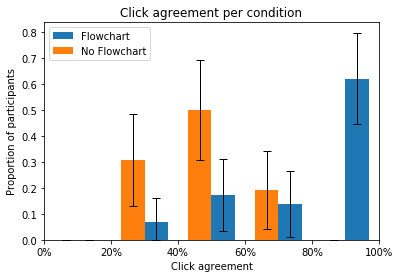

In [105]:
epa.create_barplot2(df0, df1, 'pair_agreement', [0 , 0.2, 0.4, 0.6, 0.8, 1])
plt.legend()
plt.xticks([0., 0.2, 0.4,  0.6,  0.8,  1], labels=['0%', '20%','40%', '60%', '80%','100%'])
plt.title('Click agreement per condition')
plt.xlabel('Click agreement')
plt.ylabel('Proportion of participants')
#plt.savefig('plots/exp1_ca.png', dpi=300)

[8.5, 15.5, 22.5, 29.5, 36.5]


Text(0, 0.5, 'Proportion of participants')

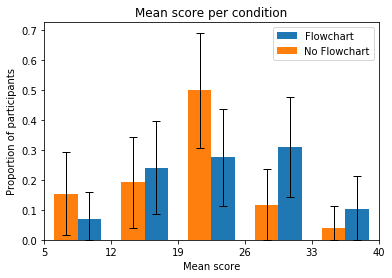

In [106]:
epa.create_barplot2(df0, df1, 'mean_rew', [5, 12,   19,  26,  33,  40])
plt.legend()
plt.title('Mean score per condition')
plt.xlabel('Mean score')
plt.ylabel('Proportion of participants')
#plt.savefig('plots/exp2_mr.png', dpi=300)

In [88]:
min(df_valid.rews_exp_mean) # 7, 38 -> diff 31 -> 35 [5, 12,   19,  26,  33,  40]

7.1

[8.5, 15.5, 22.5, 29.5, 36.5]


Text(0, 0.5, 'Proportion of participants')

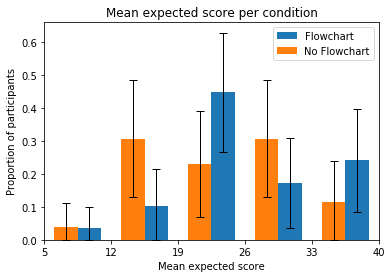

In [107]:
epa.create_barplot2(df0, df1, 'rews_exp_mean', [5, 12,   19,  26,  33,  40])
plt.legend()
plt.title('Mean expected score per condition')
plt.xlabel('Mean expected score')
plt.ylabel('Proportion of participants')
#plt.savefig('plots/exp2_emr.png', dpi=300)

(array([ 1.,  6.,  8.,  8.,  5.,  6.,  1.,  4.,  2., 14.]),
 array([0.2 , 0.28, 0.36, 0.44, 0.52, 0.6 , 0.68, 0.76, 0.84, 0.92, 1.  ]),
 <a list of 10 Patch objects>)

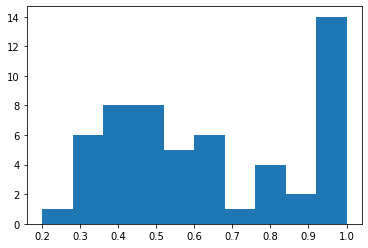

In [30]:
plt.hist(df_valid.pair_agreement)

(array([ 1.,  6.,  3.,  8.,  8.,  5., 11.,  4.,  6.,  3.]),
 array([ 6.5 ,  9.49, 12.48, 15.47, 18.46, 21.45, 24.44, 27.43, 30.42, 33.41, 36.4 ]),
 <a list of 10 Patch objects>)

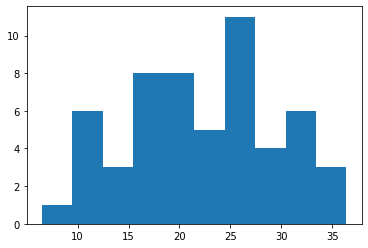

In [29]:
plt.hist(df_valid.mean_rew)

(array([ 1.,  3.,  8.,  2., 10.,  5.,  9.,  6.,  7.,  4.]),
 array([ 71. , 101.7, 132.4, 163.1, 193.8, 224.5, 255.2, 285.9, 316.6, 347.3, 378. ]),
 <a list of 10 Patch objects>)

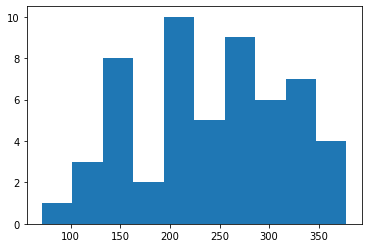

In [70]:
plt.hist(df_valid.rews_exp_total)